In [1]:
!pip install plotly==5.14.1
!pip install "jupyterlab>=3" "ipywidgets>=7.6"
!pip install jupyter-dash
!pip install -U kaleido

In [2]:
import numpy as np
import pandas as pd
import openpyxl as xl
import FILibExcel
import seaborn as sns
import matplotlib.pyplot as plt

# Data Processing

In [3]:
excel_path = r"../mock/titanium sols.xlsx"
artifacts_path = r"../mock/soles_artifacts/second_dataset/"

In [4]:
tables_dict = FILibExcel.get_all_tables(file_name=excel_path)
df = tables_dict["Table2"]['dataframe']
df = df.fillna(value=0)


worksheet name: Sheet1
tables in worksheet: 0

worksheet name: Experiment_data
tables in worksheet: 1
table name: Table1

worksheet name: Experiment_data_2
tables in worksheet: 1
table name: Table2


In [5]:
df.shape

(76, 9)

In [6]:
df.head()

,Composition mixtures,"t, °С","t, min","с(acid), mol/l","с(Ti4+), mol/l",ultrasound,"d, nm","Contents, %","Stability of sols, days"
0,H2O + HNO3 + TiIPO + ButOH,45,60,4.0,0.50,0.0,618.500,100.0,16.0
1,H2O + HNO3 + TiIPO + ButOH,80,10,4.0,0.50,0.0,978.100,100.0,16.0
2,H2O + HNO3 + TiIPO + ButOH,45,20,4.0,0.50,0.0,2.000,100.0,90.0
3,H2O + HNO3 + TiIPO + ButOH,45,20,4.0,0.47,0.0,2.628,100.0,60.0
4,H2O + HNO3 + TiIPO + IPOОН,50,20,4.0,0.20,0.0,1712.000,100.0,16.0


In [7]:
df.drop('Composition mixtures', axis=1).astype('float').describe().T

,count,mean,std,min,25%,50%,75%,max
"t, °С",76.0,61.592105,19.864996,20.00,45.000,70.0000,80.00,93.00
"t, min",76.0,31.236842,30.303737,8.00,11.000,13.5000,58.50,130.00
"с(acid), mol/l",76.0,1.004737,1.493205,0.10,0.100,0.1000,1.58,4.00
"с(Ti4+), mol/l",76.0,0.425526,0.191154,0.14,0.200,0.5000,0.60,0.62
ultrasound,76.0,0.157895,0.401751,0.00,0.000,0.0000,0.00,1.50
"d, nm",76.0,666.301395,924.147741,0.70,2.028,2.6955,2000.00,3096.00
"Contents, %",76.0,97.226316,13.895729,0.50,100.000,100.0000,100.00,100.00
"Stability of sols, days",76.0,24.657895,23.828864,0.00,2.000,16.0000,40.00,90.00


In [8]:
df.dtypes

Composition mixtures        object
t, °С                        int64
t, min                       int64
с(acid), mol/l             float64
с(Ti4+), mol/l             float64
ultrasound                 float64
d, nm                      float64
Contents, %                float64
Stability of sols, days    float64
dtype: object

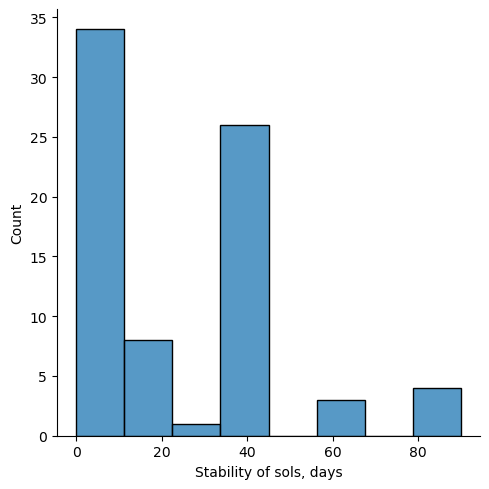

In [9]:
sns.displot(df['Stability of sols, days'])

In [10]:
X = df.drop(['Composition mixtures', 'Contents, %', 'd, nm', 'Stability of sols, days', 'ultrasound '], axis=1)
y_days = df['Stability of sols, days']
y_d = df['d, nm']
y_content = df['Contents, %']

In [11]:
X

,"t, °С","t, min","с(acid), mol/l","с(Ti4+), mol/l"
0,45,60,4.0,0.50
1,80,10,4.0,0.50
2,45,20,4.0,0.50
3,45,20,4.0,0.47
4,50,20,4.0,0.20
...,...,...,...,...
71,70,12,0.1,0.62
72,70,12,0.1,0.59
73,70,12,0.1,0.55
74,70,12,0.1,0.52


# Linear regression for coafitionts predictions

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

parameters = {'fit_intercept': [True, False]}

model = LinearRegression()
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
clf.fit(X, y_days)
best_linear_regression_days = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)
print(best_linear_regression_days.coef_)

-14.58291859997614
{'fit_intercept': False}
[-0.16239344 -0.14348742  5.17165432 79.93796575]


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

parameters = {'fit_intercept': [True, False]}

model = LinearRegression()
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
pipe = make_pipeline(StandardScaler(), clf)
pipe.fit(X, y_d)
best_linear_regression_d = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)
print(best_linear_regression_d.coef_)

-368.24754555121774
{'fit_intercept': True}
[  20.51977907 -280.85882185 -114.71075337 -954.93848214]


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

parameters = {'fit_intercept': [True, False]}

model = LinearRegression()
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
clf.fit(X, y_content)
best_linear_regression_content = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)
print(best_linear_regression_content.coef_)

-7.034565659695543
{'fit_intercept': True}
[ -0.14796999  -0.25009727  -2.29404887 -12.32332723]


# Optimisation with NSGA2 algorithm

In [15]:
!pip install -U pymoo

In [16]:
-np.append(best_linear_regression_days.coef_, best_linear_regression_days.intercept_)

array([  0.16239344,   0.14348742,  -5.17165432, -79.93796575,
        -0.        ])

In [17]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.problem import ElementwiseProblem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter


class SoleProblem(ElementwiseProblem):
    def __init__(self, coefs):
        self.coefs = coefs
        super().__init__(n_var=4, n_obj=2, n_ieq_constr=2,
                         xl=np.array([20, 5, 0.1, 0.14]),
                         xu=np.array([80, 130, 4, 0.47]) )

    def _evaluate(self, x, out, *args, **kwargs):
        fs = []
        gs = []
        for coef in self.coefs:
            f = coef[-1]
            for i in range(0, len(coef) - 1):
                f += x[i] * coef[i]    
            fs.append(f)
        out["F"] = fs
        out["G"] = [fs[0], -fs[1] + 0.7]


problem = SoleProblem(
    [-np.append(best_linear_regression_days.coef_, best_linear_regression_days.intercept_),
     np.append(best_linear_regression_d.coef_, best_linear_regression_d.intercept_)])

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ("n_gen", 500),
               verbose=False,
               seed=1)

In [18]:
import plotly.express as px
F = res.F
fig = px.scatter(x=-F[:, 0], y=F[:, 1], labels={"x": "Stability of sols, days", "y": "d, nm"})
fig.write_html(artifacts_path + 'first_figure.html', auto_open=True)
fig.write_image(artifacts_path + 'optimal.png')

In [19]:
for f, x in zip(res.F, res.X):
    print(f'For getting stability days = {round(-f[0], 3)} and diameter = {round(f[1], 3)} use:')
    print(f'\ttemperature = {round(x[0], 3)}')
    print(f'\ttime = {round(x[1], 3)}')
    print(f'\tc(acid) = {round(x[2], 3)}')
    print(f'\tc(Ti) = {round(x[3], 3)}')

For getting stability days = 44.326 and diameter = 0.7 use:
	temperature = 79.991
	time = 5.0
	c(acid) = 3.957
	c(Ti) = 0.47
For getting stability days = 44.333 and diameter = 0.7 use:
	temperature = 80.0
	time = 5.0
	c(acid) = 3.958
	c(Ti) = 0.47
For getting stability days = 44.333 and diameter = 0.7 use:
	temperature = 80.0
	time = 5.0
	c(acid) = 3.958
	c(Ti) = 0.47
For getting stability days = 44.333 and diameter = 0.7 use:
	temperature = 80.0
	time = 5.0
	c(acid) = 3.958
	c(Ti) = 0.47
For getting stability days = 44.332 and diameter = 0.7 use:
	temperature = 79.999
	time = 5.0
	c(acid) = 3.958
	c(Ti) = 0.47
For getting stability days = 44.333 and diameter = 0.7 use:
	temperature = 80.0
	time = 5.0
	c(acid) = 3.958
	c(Ti) = 0.47
For getting stability days = 44.333 and diameter = 0.7 use:
	temperature = 80.0
	time = 5.0
	c(acid) = 3.958
	c(Ti) = 0.47
For getting stability days = 44.333 and diameter = 0.7 use:
	temperature = 80.0
	time = 5.0
	c(acid) = 3.958
	c(Ti) = 0.47
For getting 

# Random forest feature importance prediction

In [20]:
!pip install xgboost

In [21]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb 

In [22]:
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]


In [23]:
def draw_importance(importances, model_name, columns=X.columns):
    features = {}
    color1 = "#2D466D"
    color2 = "#A2B0C5"
    for i, feature in enumerate(columns):
        features[f"f{i+1}"] = feature

    indices = np.argsort(importances)[::-1]
    num_to_plot = len(columns)
    feature_indices = [ind + 1 for ind in indices[:num_to_plot]]

    print("Feature ranking:")
    for f in range(num_to_plot):
        print(
            "%d. %s %f "
            % (f + 1, features["f" + str(feature_indices[f])], importances[indices[f]])
        )
    plt.figure(figsize=(20, 10))
    bars = plt.bar(
        range(num_to_plot),
        importances[indices[:num_to_plot]],
        color=get_color_gradient(color1, color2, num_to_plot),
        align="center",
    )
    ticks = plt.xticks(range(num_to_plot), feature_indices, fontsize=22)
    plt.yticks(fontsize=22)
    plt.xlim([-1, num_to_plot])
    plt.legend(bars, [u"".join(features["f" + str(i)]) for i in feature_indices], fontsize="24");
    plt.title(f"Feature importance in {model_name}", fontsize=22)
    plt.savefig(f'{artifacts_path}{model_name}.eps', format='eps', dpi=600, bbox_inches='tight', transparent="True", pad_inches=0)
    

In [24]:
def draw_random_forest(X, y, name):
    parameters = {
        'n_estimators': range(100, 500, 100),
        'max_depth': [None] + list(range(3, 11, 2))}

    model = RandomForestRegressor(random_state=42)
    clf = GridSearchCV(
        model, 
        parameters, 
        cv=5, 
        scoring='neg_mean_absolute_error',
        refit=True,
        n_jobs=-1)
    clf.fit(X, y)
    best_random_forest = clf.best_estimator_
    print(clf.best_score_)
    print(clf.best_params_)
    draw_importance(best_random_forest.feature_importances_, f"Random forest {name}")

In [25]:
def draw_gradient_boosting(X, y, name):
    parameters = {
        'learning_rate': [0.5, 0.25, 0.1, 0.05, 0.01],
        'n_estimators': [4, 8, 16, 32, 64, 128],
        'max_depth': range(1, 18, 2)}

    model = GradientBoostingRegressor(random_state=42)
    clf = GridSearchCV(
        model, 
        parameters, 
        cv=5, 
        scoring='neg_mean_absolute_error',
        refit=True,
        n_jobs=-1)
    clf.fit(X, y)
    best_gradient_boost = clf.best_estimator_
    print(clf.best_score_)
    print(clf.best_params_)
    draw_importance(best_gradient_boost.feature_importances_, f"Gradient boost {name}")

In [26]:
def draw_xgboost(X, y, name):
    parameters = {
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.5, 1, 1.5, 2, 2.5,],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
    }

    model = xgb.XGBRegressor(learning_rate=0.02, n_estimators=600, nthread=1, seed=0)
    clf = GridSearchCV(
        model, 
        parameters, 
        cv=5, 
        scoring='neg_mean_absolute_error',
        refit=True,
        n_jobs=-1)
    clf.fit(X, y)
    best_xgboost = clf.best_estimator_
    print(clf.best_score_)
    print(clf.best_params_)
    draw_importance(best_xgboost.feature_importances_, f"XGboost {name}")

-9.710567361111114
{'max_depth': 9, 'n_estimators': 100}
Feature ranking:
1. с(Ti4+), mol/l 0.492013 
2. t, min 0.235089 
3. t, °С 0.201074 
4. с(acid), mol/l 0.071823 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


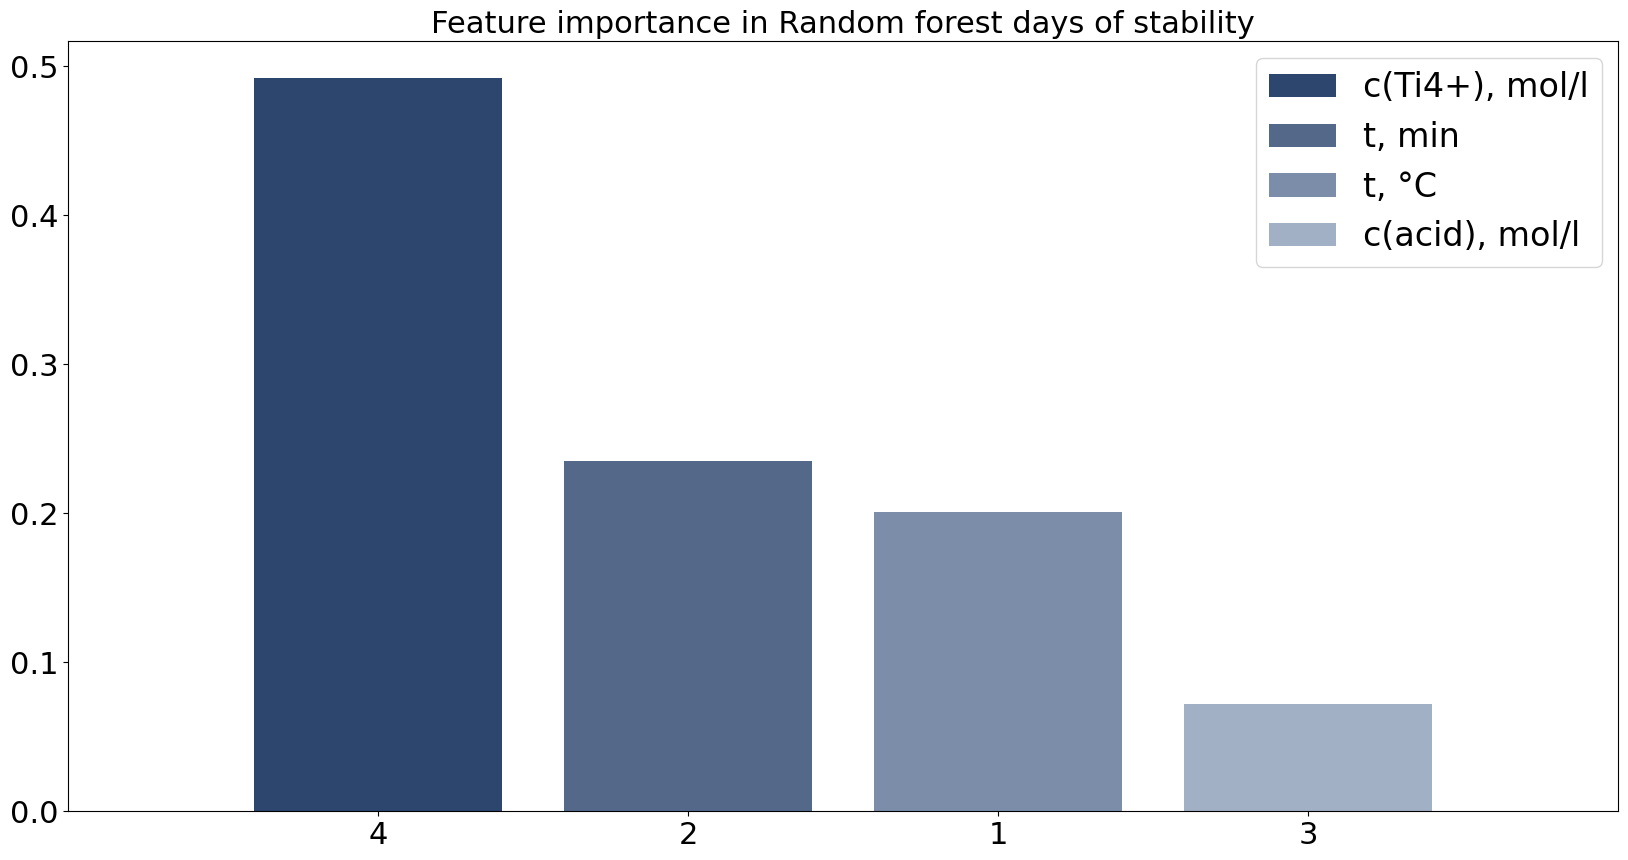

In [27]:
draw_random_forest(X, y_days, "days of stability")

-9.574659434587378
{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 8}
Feature ranking:
1. t, min 0.579027 
2. с(acid), mol/l 0.196640 
3. с(Ti4+), mol/l 0.112840 
4. t, °С 0.111493 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


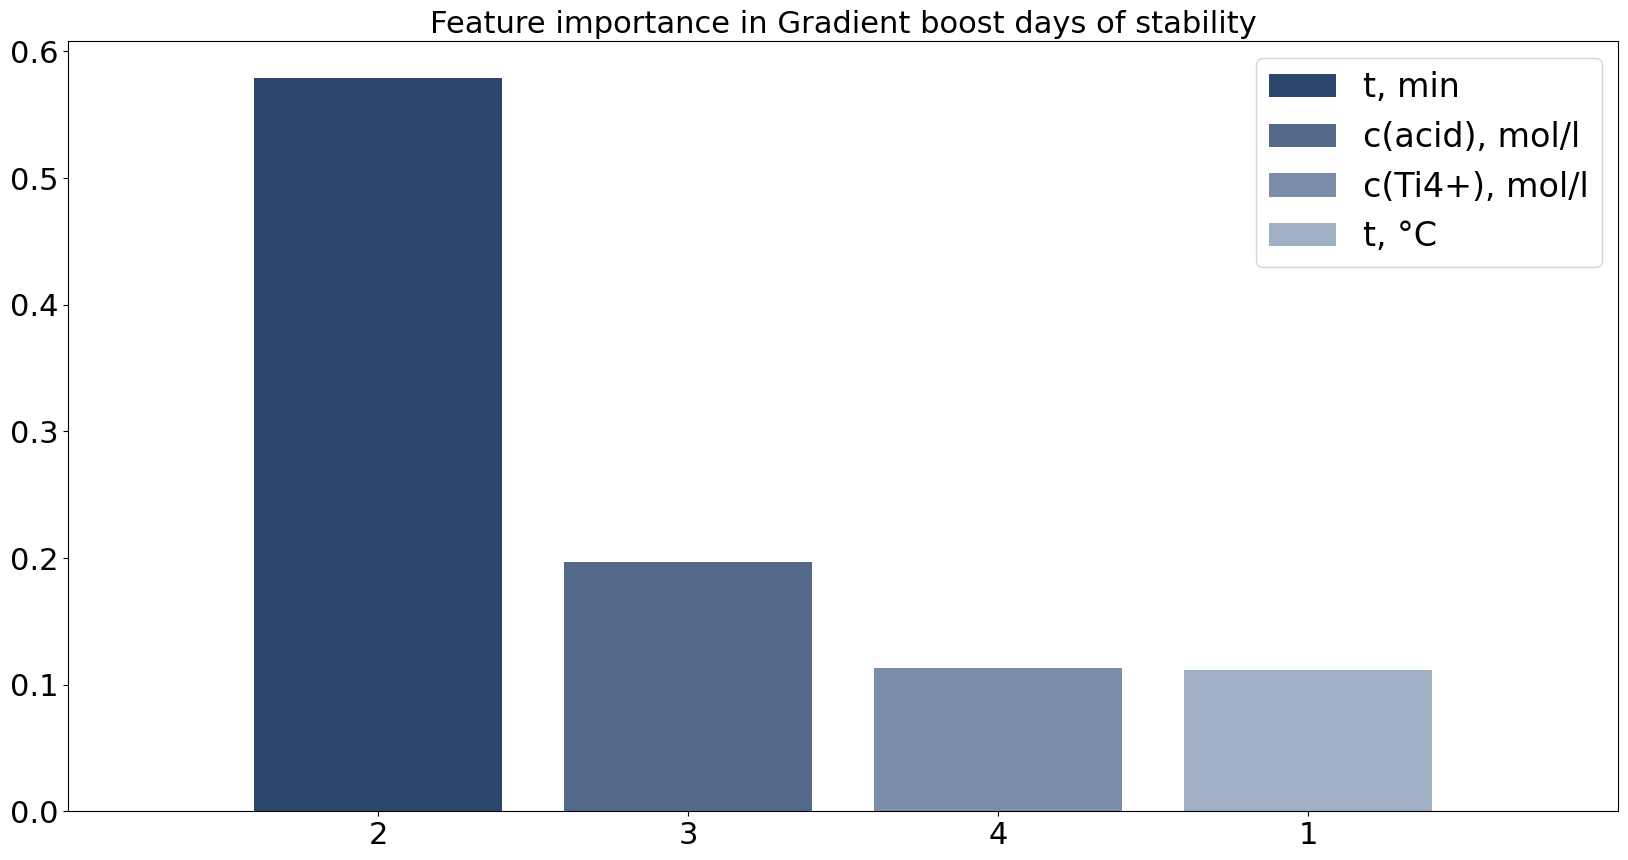

In [28]:
draw_gradient_boosting(X, y_days, "days of stability")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


-9.982097424417734
{'colsample_bytree': 1.0, 'gamma': 2.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.6}
Feature ranking:
1. с(Ti4+), mol/l 0.352751 
2. t, min 0.323718 
3. с(acid), mol/l 0.189004 
4. t, °С 0.134527 


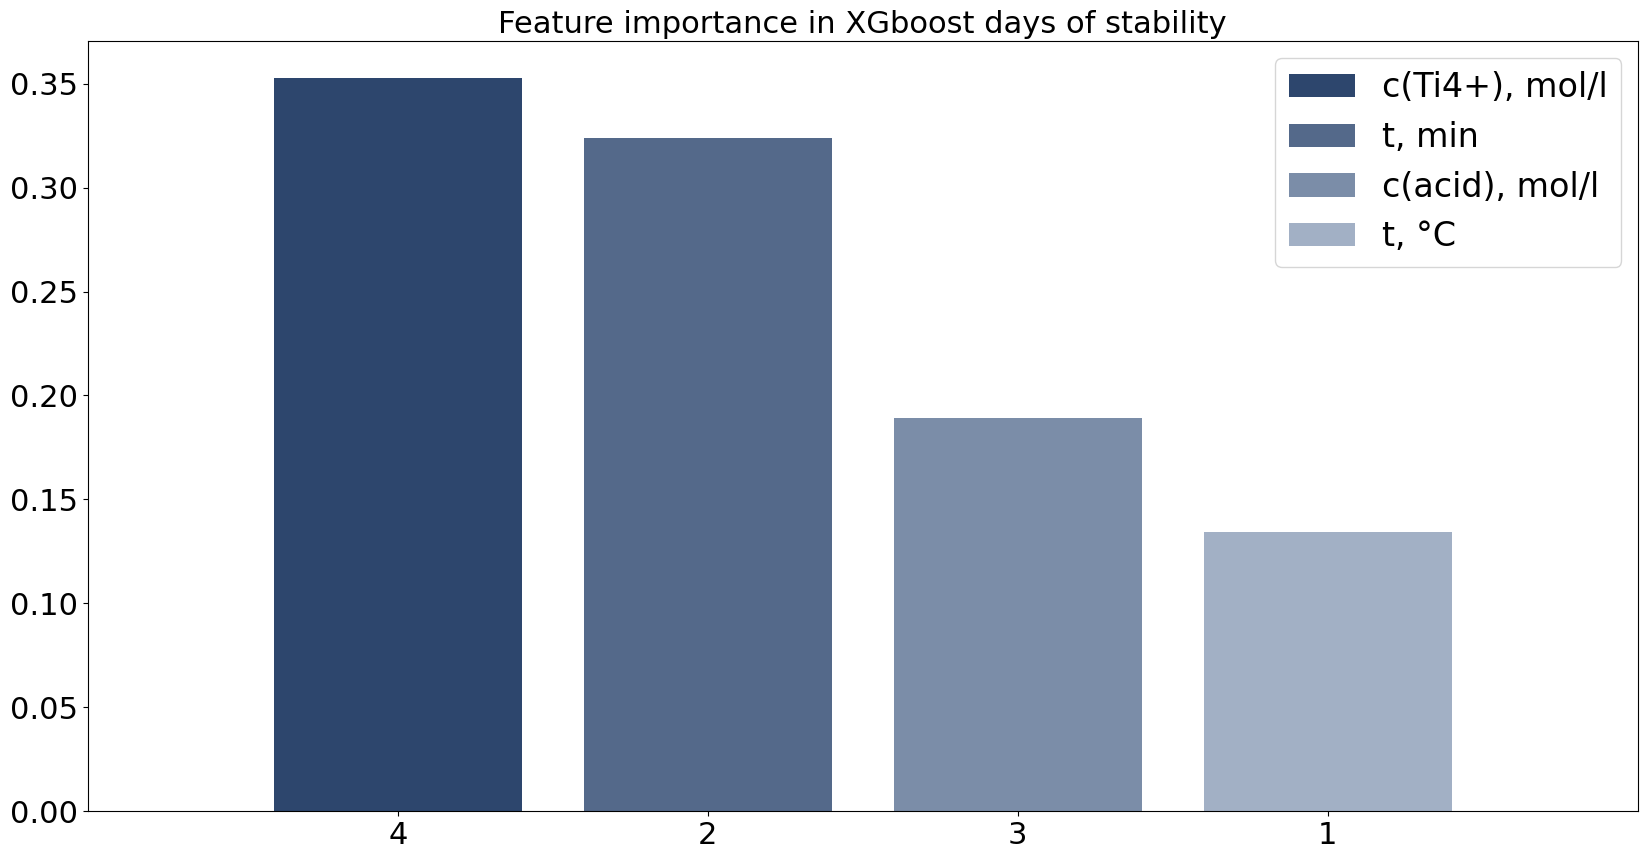

In [29]:
draw_xgboost(X, y_days, "days of stability")

-461.5908633344572
{'max_depth': 9, 'n_estimators': 100}
Feature ranking:
1. с(Ti4+), mol/l 0.725932 
2. t, min 0.108907 
3. с(acid), mol/l 0.086315 
4. t, °С 0.078845 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


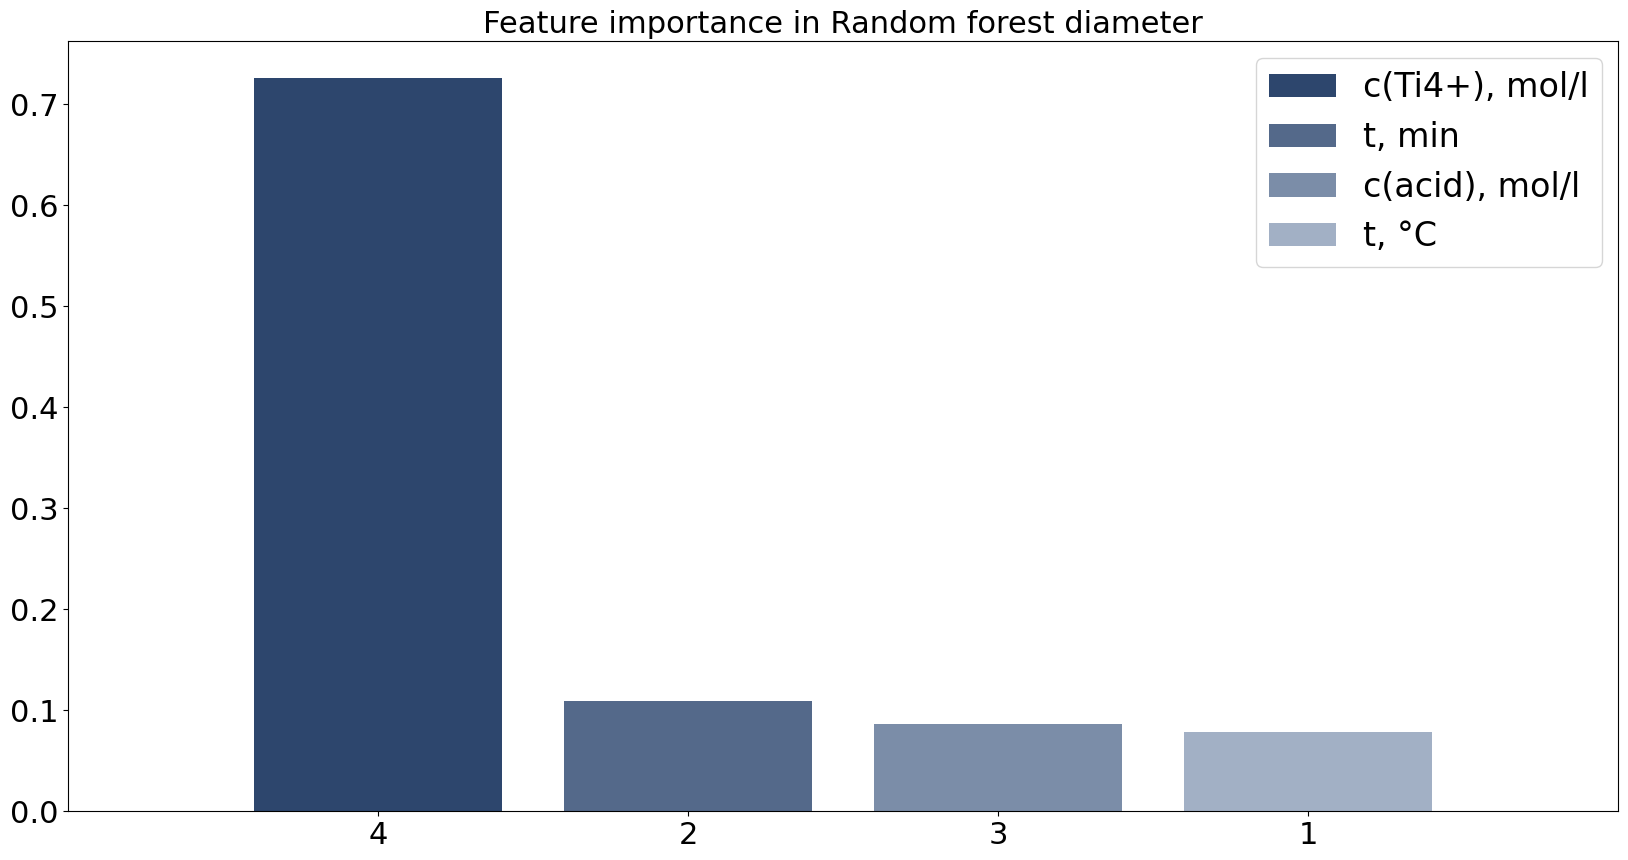

In [30]:
draw_random_forest(X, y_d, "diameter")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


-434.29930768403773
{'learning_rate': 0.25, 'max_depth': 1, 'n_estimators': 16}
Feature ranking:
1. с(Ti4+), mol/l 0.860485 
2. с(acid), mol/l 0.079752 
3. t, min 0.059762 
4. t, °С 0.000000 


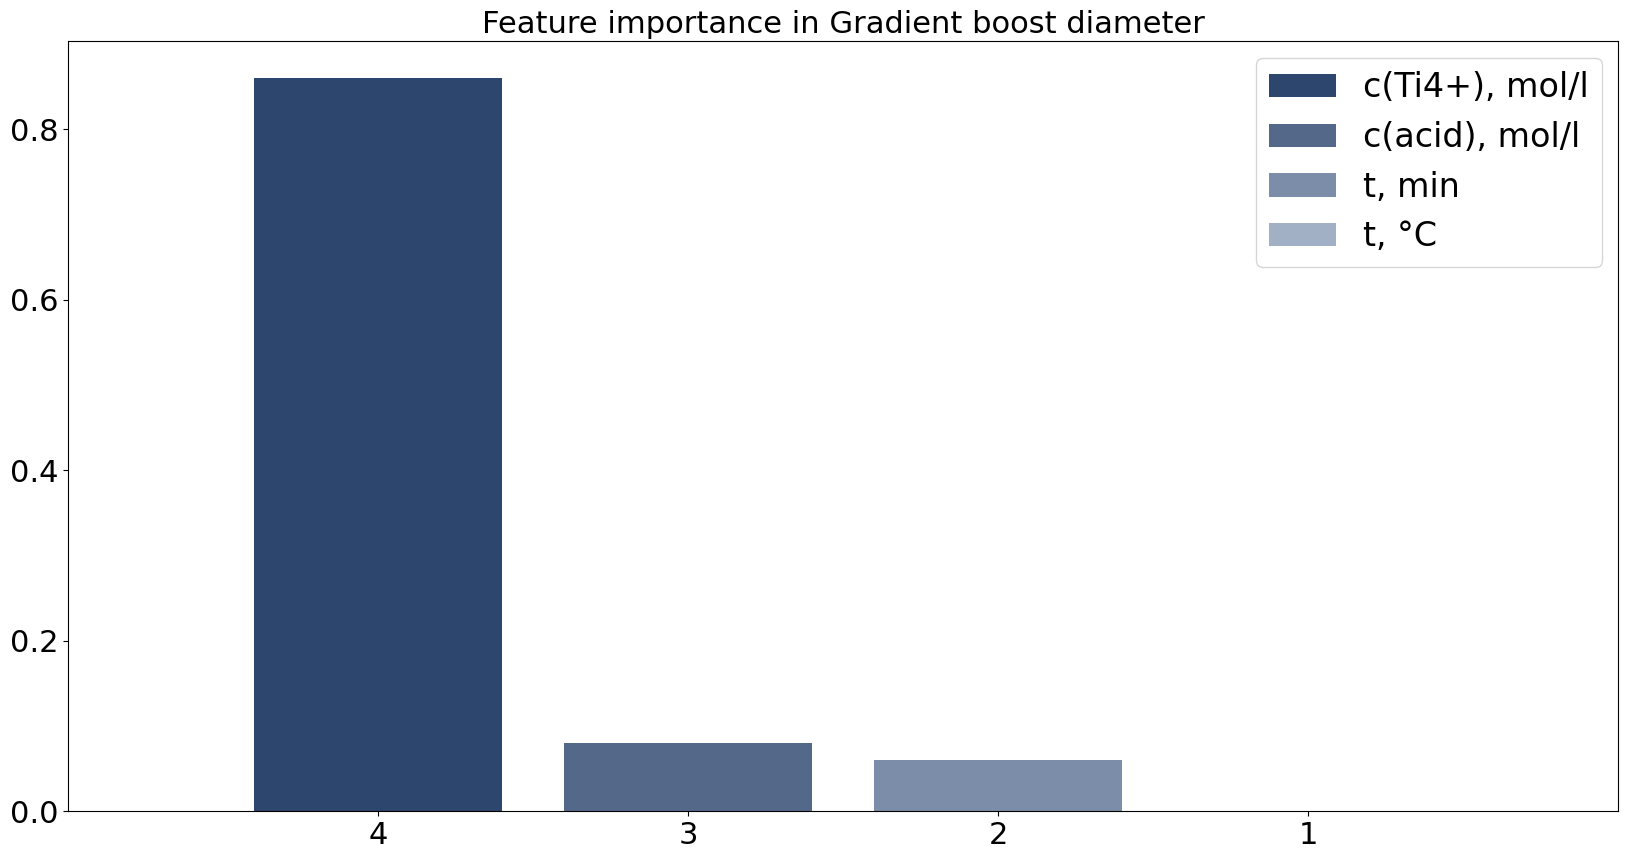

In [31]:
draw_gradient_boosting(X, y_d, "diameter")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


-402.63846306040443
{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.6}
Feature ranking:
1. с(Ti4+), mol/l 0.460165 
2. с(acid), mol/l 0.300722 
3. t, min 0.157643 
4. t, °С 0.081470 


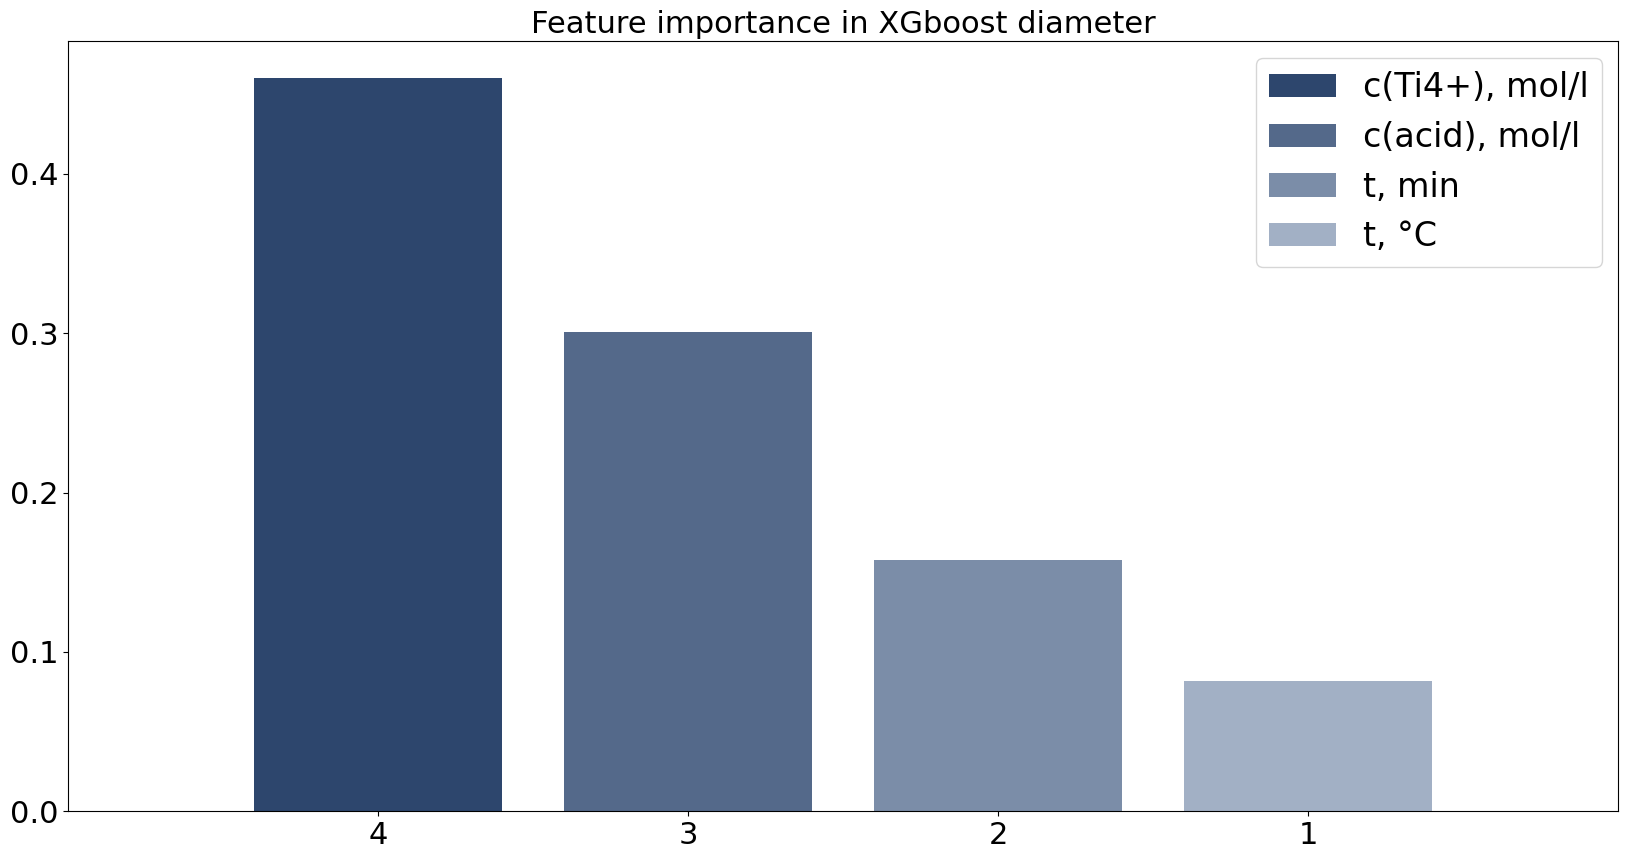

In [39]:
draw_xgboost(X, y_d, "diameter")

## Results

In [40]:
df.columns

Index(['Composition mixtures', 't, °С', 't, min', 'с(acid), mol/l',
       'с(Ti4+), mol/l', 'ultrasound ', 'd, nm', 'Contents, %',
       'Stability of sols, days', 'd_categorical'],
      dtype='object')

In [41]:
import plotly.express as px

fig = px.scatter(df, x='с(Ti4+), mol/l', y='d, nm', color='Stability of sols, days', hover_data=df.columns, width=900, height=600)

# # Customize aspect
fig.update_traces(marker=dict(size=8, line=dict(width=0.5)), selector=dict(mode='markers')) 
fig.update_layout(title='c(Ti4+) to d, nm', xaxis_title='с(Ti4+), mol/l', yaxis_title='d, nm')
# fig.update_yaxes(scaleanchor = "x", scaleratio = 1)
fig.write_html(artifacts_path + "Plot_c(Ti4+)_to_d,nm.html")
fig.show()

In [42]:
new_col = []
for elem in df['d, nm']:
    if elem > 2000:
        new_col.append(5)
    elif elem > 1000:
        new_col.append(4)
    elif elem > 400:
        new_col.append(3)
    elif elem > 2:
        new_col.append(2)
    elif elem > 1:
        new_col.append(1)
    else:
        new_col.append(0)
df['d_categorical'] = new_col

In [43]:
df

,Composition mixtures,"t, °С","t, min","с(acid), mol/l","с(Ti4+), mol/l",ultrasound,"d, nm","Contents, %","Stability of sols, days",d_categorical
0,H2O + HNO3 + TiIPO + ButOH,45,60,4.0,0.50,0.0,618.500,100.0,16.0,3
1,H2O + HNO3 + TiIPO + ButOH,80,10,4.0,0.50,0.0,978.100,100.0,16.0,3
2,H2O + HNO3 + TiIPO + ButOH,45,20,4.0,0.50,0.0,2.000,100.0,90.0,1
3,H2O + HNO3 + TiIPO + ButOH,45,20,4.0,0.47,0.0,2.628,100.0,60.0,2
4,H2O + HNO3 + TiIPO + IPOОН,50,20,4.0,0.20,0.0,1712.000,100.0,16.0,4
...,...,...,...,...,...,...,...,...,...,...
71,H2O + TiOSO₄´xH2SO4´yH2O,70,12,0.1,0.62,0.0,2.900,99.5,40.0,2
72,H2O + TiOSO₄´xH2SO4´yH2O,70,12,0.1,0.59,0.0,1.901,100.0,40.0,1
73,H2O + TiOSO₄´xH2SO4´yH2O,70,12,0.1,0.55,0.0,2.841,100.0,40.0,2
74,H2O + TiOSO₄´xH2SO4´yH2O,70,12,0.1,0.52,0.0,2.162,97.8,40.0,2


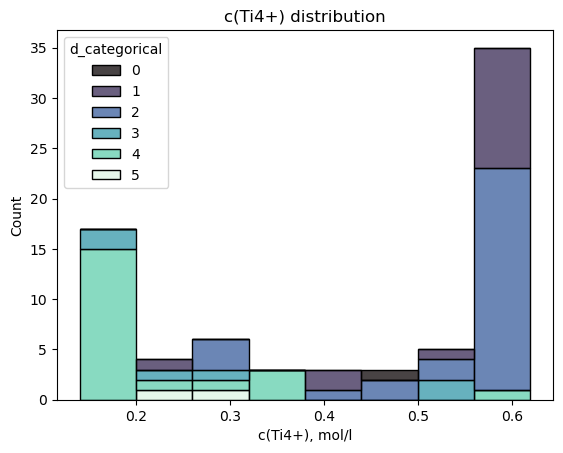

In [44]:

sns.histplot(df, x='с(Ti4+), mol/l', hue='d_categorical', multiple="stack", palette='mako').set(title=f'с(Ti4+) distribution')

plt.show()

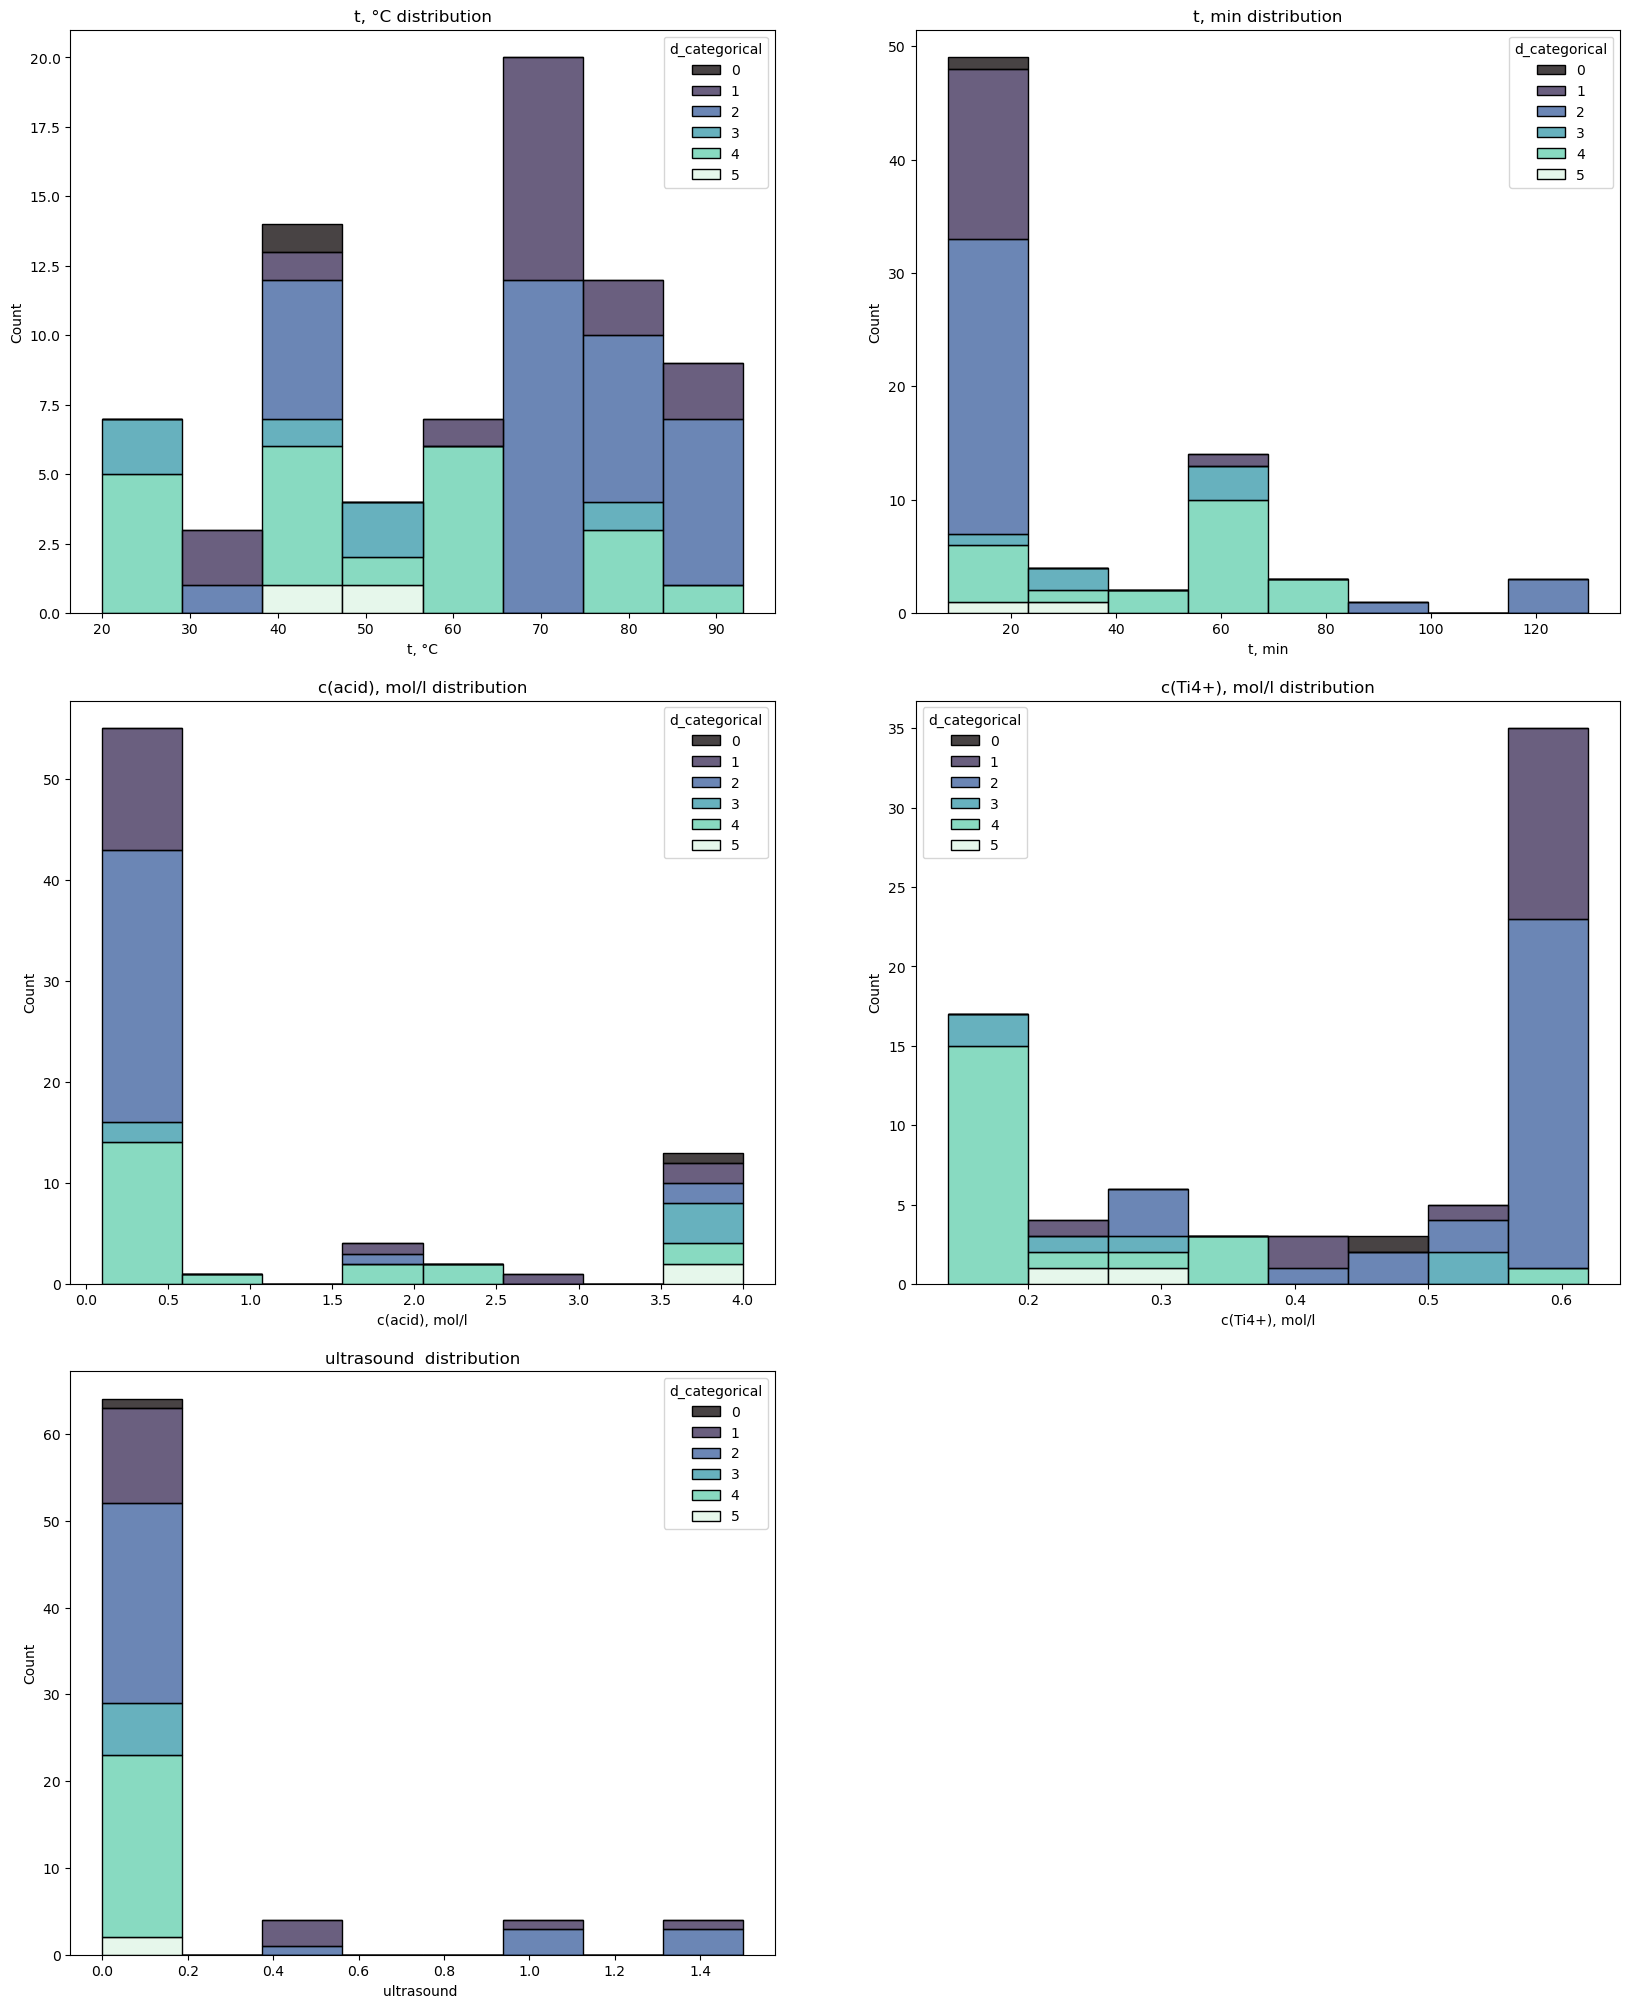

In [45]:
fig, axes = plt.subplots(ncols=2, nrows=3)
fig.set_size_inches(20, 25)

for col, ax in zip(['t, °С', 't, min', 'с(acid), mol/l', 'с(Ti4+), mol/l', 'ultrasound '], axes.flat):
    sns.histplot(df, x=col, hue='d_categorical', multiple="stack", palette='mako', ax=ax).set(title=f'{col} distribution')

fig.subplots_adjust(hspace=0.15)
axes[-1, -1].axis('off')
plt.savefig(artifacts_path + 'distibution_with_d_categorical.pdf', format='pdf', dpi=600)
plt.show()